In [1]:
from google.colab import drive as drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Access a public Github repos
!rm -rf /content/MT-Small-Dataset # remove git clone
%cd '/content'
!git clone https://github.com/ricardotran92/MT-Small-Dataset.git

/content
Cloning into 'MT-Small-Dataset'...
remote: Enumerating objects: 1223, done.
remote: Counting objects: 100% (1223/1223), done.
remote: Compressing objects: 100% (1219/1219), done.
remote: Total 1223 (delta 4), reused 1223 (delta 4), pack-reused 0
Receiving objects: 100% (1223/1223), 14.72 MiB | 14.52 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from PIL import Image


In [4]:
# @title
def DataSetSummary (local_path, tabs):
  # Take list of files & folders in local folder
  all_items = os.listdir(local_path)

  # Filter folder list
  folders = [item for item in all_items if os.path.isdir(os.path.join(local_path, item))]

  # Print summary information if folders > 0:
  if(len(folders) > 0):
    indent = '\t' * tabs
    print("{}Tổng số thư mục: {}".format(indent, len(folders)))
    for folder in folders:
      folder_path = os.path.join(local_path, folder)
      files_in_folder = len(os.listdir(folder_path))
      print("{}-Thư mục: {}, Số tệp: {}".format(indent, folder, files_in_folder))
      DataSetSummary(folder_path, tabs+1)

# DataSetSummary(local_path, 0)

In [5]:
# import os

# Hierarchical local folder in Colab
repository_folder = ["MT-Small-Dataset"]

for folder in repository_folder:
  local_path = '/content/' + folder + '/dataset'
  DataSetSummary(local_path, 0)
  local_path = '/content/' + folder + '/sample'
  DataSetSummary(local_path, 0)

Tổng số thư mục: 2
-Thư mục: Malignant, Số tệp: 200
-Thư mục: Benign, Số tệp: 200
Tổng số thư mục: 2
-Thư mục: Malignant, Số tệp: 3
	Tổng số thư mục: 3
	-Thư mục: Fuzzy_Malignant, Số tệp: 20
	-Thư mục: Original_Malignant, Số tệp: 20
	-Thư mục: Ground_Truth_Malignant, Số tệp: 20
-Thư mục: Benign, Số tệp: 3
	Tổng số thư mục: 3
	-Thư mục: Original_Benign, Số tệp: 20
	-Thư mục: Fuzzy_Benign, Số tệp: 20
	-Thư mục: Ground_Truth_Benign, Số tệp: 20


In [6]:
%cd /content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/MT-Small-Dataset

/content/drive/.shortcut-targets-by-id/1FC4gIMvvGGW3aULXiiL6wB3DkEQoP4FR/Thesis/Preprocessing/MT-Small-Dataset


In [7]:
# Set the path to your dataset
dataset_path = '/content/MT-Small-Dataset/sample'
# dataset_path = '/content/MT-Small-Dataset/dataset'

Class Malignant


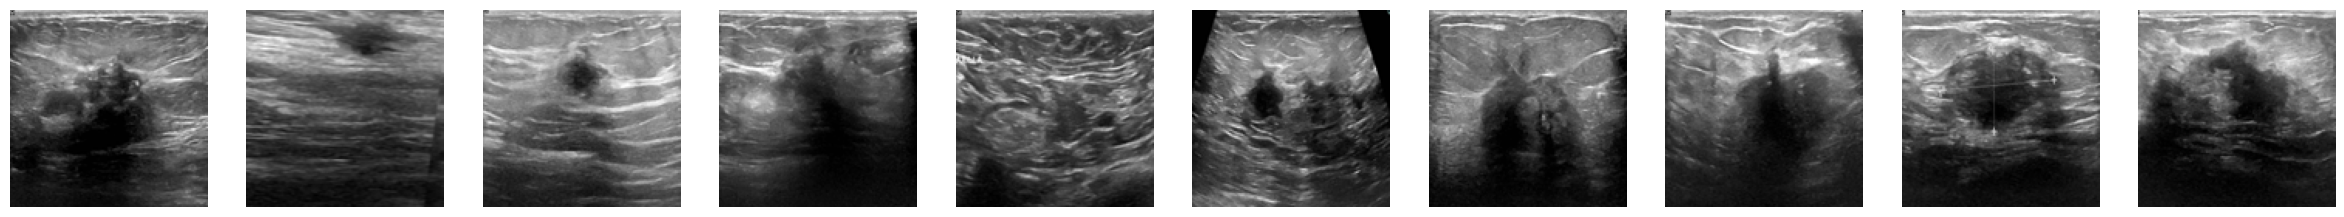

Class Benign


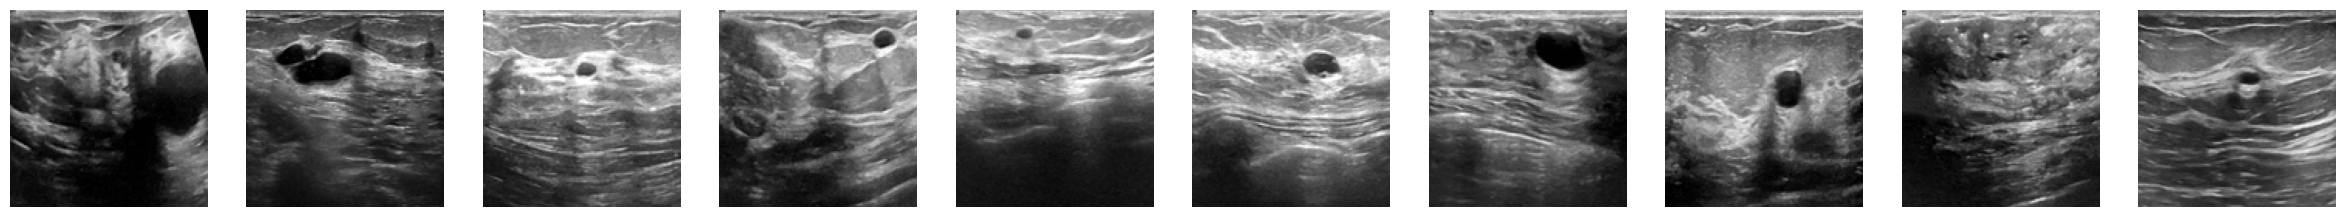

In [9]:
class Image:
    def __init__(self, path, label):
        # self.image = cv2.imread(path) # directly read
        self.path = path # only directory
        self.label = label

def load_images_from_folder(dataset_path, images_per_class=None):
    images = {}
    for class_name in os.listdir(dataset_path):
        class_folder_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_folder_path):
            count = 0
            images[class_name] = []
            for image_name in os.listdir(class_folder_path):
                if images_per_class is None or count < images_per_class:
                    image_path = os.path.join(class_folder_path, image_name)
                    img = Image(image_path, class_name)
                    images[class_name].append(img)
                    count += 1
    return images

def imshow(images, images_per_class=None):
    for class_name, imgs in images.items():
        plt.figure(figsize=(30,30))
        print(f'Class {class_name}')
        for i in range(min(images_per_class if images_per_class else len(imgs), len(imgs))):
            plt.subplot(1, images_per_class if images_per_class else len(imgs), i+1)
            img = cv2.imread(imgs[i].path)
            # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.imshow(img)
            # plt.title(os.path.basename(imgs[i].path))
            plt.axis('off')
        plt.show()

# Example usage:
images = load_images_from_folder('/content/MT-Small-Dataset/dataset')
imshow(images, 10)


In [10]:
from PIL import Image

def get_image_specifications(image_path):
    # Open the image file
    with Image.open(image_path) as img:
        # Get image specifications
        image_format = img.format
        image_mode = img.mode
        image_size = img.size
        image_width, image_height = img.size
        image_color = img.getcolors()

    return f"Image Format: {image_format}\nImage Mode: {image_mode}\nImage Size: {image_size} pixels (Width: {image_width}, Height: {image_height})\nImage Colors: {image_color}"

# Example usage:
print('images.keys:', images.keys())
image_path = "/content/MT-Small-Dataset/dataset/Malignant/malignant_Adjusted (1).png"
# print('image_path:',image_path := images['normal'][0].path)
image_specifications = get_image_specifications(image_path)
print(image_specifications)

images.keys: dict_keys(['Malignant', 'Benign'])
Image Format: PNG
Image Mode: RGB
Image Size: (128, 128) pixels (Width: 128, Height: 128)
Image Colors: [(1, (255, 255, 255)), (7, (251, 251, 251)), (8, (249, 249, 249)), (17, (247, 247, 247)), (12, (245, 245, 245)), (26, (243, 243, 243)), (25, (241, 241, 241)), (21, (239, 239, 239)), (30, (237, 237, 237)), (40, (235, 235, 235)), (51, (233, 233, 233)), (40, (231, 231, 231)), (43, (229, 229, 229)), (45, (227, 227, 227)), (50, (225, 225, 225)), (44, (223, 223, 223)), (51, (221, 221, 221)), (55, (219, 219, 219)), (61, (217, 217, 217)), (60, (215, 215, 215)), (69, (213, 213, 213)), (66, (211, 211, 211)), (49, (209, 209, 209)), (58, (207, 207, 207)), (76, (205, 205, 205)), (70, (203, 203, 203)), (79, (201, 201, 201)), (72, (199, 199, 199)), (79, (197, 197, 197)), (86, (195, 195, 195)), (63, (193, 193, 193)), (74, (189, 189, 189)), (63, (187, 187, 187)), (64, (185, 185, 185)), (50, (183, 183, 183)), (59, (181, 181, 181)), (51, (179, 179, 179)),

## Noise Metrics

GitHub Copilot: The evaluation metrics indicate that both the Github Copilot's code and ChatGPT's code have successfully reduced the noise in the image, as evidenced by the non-infinite PSNR and non-zero RMSE values.

The PSNR (Peak Signal-to-Noise Ratio) is a measure of the peak error. The fact that PSNR is infinite for the original image indicates there's no noise (as it's being compared with itself), while for the processed images, the PSNR values are finite and quite high, indicating a low level of distortion.

The RMSE (Root Mean Square Error) is a quadratic scoring rule that measures the average magnitude of the error. The fact that RMSE is zero for the original image indicates there's no error (as it's being compared with itself), while for the processed images, the RMSE values are non-zero but quite low, indicating a low level of error.

The SNR (Signal-to-Noise Ratio) is a measure of signal strength relative to background noise. The negative SNR values indicate that the noise is stronger than the signal, which is not ideal. However, the SNR values have increased (become less negative) from the original to the processed images, indicating that the signal has become stronger relative to the noise.

In terms of comparison between Github Copilot's code and ChatGPT's code, the metrics are quite similar, but ChatGPT's code has slightly better PSNR and RMSE values, indicating slightly less distortion and error. However, the differences are quite small and may not be noticeable in the image quality.

GitHub Copilot: Dĩ nhiên, dưới đây là các định nghĩa bằng tiếng Việt:

1. PSNR (Peak Signal-to-Noise Ratio - Tỉ lệ tín hiệu so với nhiễu): PSNR là một độ đo chất lượng của hình ảnh đã được khôi phục so với hình ảnh gốc. PSNR càng cao, chất lượng hình ảnh khôi phục càng tốt và càng giống với hình ảnh gốc.

2. RMSE (Root Mean Square Error - Sai số bình phương trung bình): RMSE là một độ đo sự khác biệt giữa các giá trị dự đoán bởi một mô hình và các giá trị thực tế. RMSE càng thấp, mô hình dự đoán càng chính xác.

3. SNR (Signal-to-Noise Ratio - Tỉ lệ tín hiệu so với nhiễu): SNR là một độ đo chất lượng tín hiệu so với nhiễu. SNR càng cao, chất lượng tín hiệu càng tốt và nhiễu càng ít.

Lưu ý rằng, mặc dù PSNR, RMSE, và SNR cao thường cho thấy chất lượng hình ảnh tốt hơn, nhưng chúng không phải lúc nào cũng dẫn đến độ chính xác cao hơn trong các tác vụ phân loại.

In [ ]:
from skimage.metrics import peak_signal_noise_ratio, mean_squared_error

def calculate_metrics(original, processed):
    # Github Copilot
    # Calculate the PSNR
    psnr = peak_signal_noise_ratio(original, processed)

    # Calculate the RMSE
    rmse = np.sqrt(mean_squared_error(original, processed))

    # Calculate the SNR
    mean = np.mean(processed)
    std = np.std(processed)
    snr = 20 * np.log10(mean / (std + 1e-10)) # 1e-10: avoid error std=0

    # # ChatGPT
    # mse = np.mean((original - processed)**2)
    # rmse = np.sqrt(mse)
    # psnr = 20 * np.log10(255 / rmse)  # Assuming pixel values range from 0 to 255
    # # snr = 10 * np.log10(np.sum(original**2) / mse)
    # snr = np.mean(original) / np.std(original - processed)

    return psnr, rmse, snr

It looks like you've provided information about three different image quality metrics: PSNR (Peak Signal-to-Noise Ratio), MSE (Mean Squared Error), and AMBE (Absolute Mean Brightness Error). These metrics are commonly used for assessing the quality of reconstructed or processed images. Let me explain each of them briefly:

### 1. Peak Signal-to-Noise Ratio (PSNR):

PSNR is a measure of the quality of a reconstructed or processed image. It is expressed in decibels (dB) and is calculated using the formula:

$$ PSNR = 10 \cdot \log_{10}\left(\frac{{\text{Max Value}^2}}{{\text{MSE}}}\right) $$

Where:
- $\text{Max Value}$ is the maximum pixel value of the image (usually 255 for 8-bit images).
- $\text{MSE}$ is the Mean Squared Error between the original and processed images.

### 2. Mean Squared Error (MSE):

MSE is a measure of the average squared differences between corresponding pixels of the original and processed images. It is calculated using the formula:

$$ MSE = \frac{1}{N \times M} \sum_{i=1}^{N} \sum_{j=1}^{M} (I(i, j) - P(i, j))^2 $$

Where:
- $N$ and $M$ are the dimensions of the images.
- $I(i, j)$ is the intensity of the pixel at position $(i, j)$ in the original image.
- $P(i, j)$ is the intensity of the pixel at position $(i, j)$ in the processed image.

### 3. Absolute Mean Brightness Error (AMBE):

AMBE measures the contrast between the initial image's brightness and the improved image's brightness. It is given by the formula:

$$ AMBE = \frac{1}{N \times M} \sum_{i=1}^{N} \sum_{j=1}^{M} |I(i, j) - P(i, j)| $$

Where:
- $N$ and $M$ are the dimensions of the images.
- $I(i, j)$ is the intensity of the pixel at position $(i, j)$ in the original image.
- $P(i, j)$ is the intensity of the pixel at position $(i, j)$ in the processed image.

These metrics are commonly used for image quality assessment, and you can implement them using the appropriate formulas in your chosen programming language (such as Python). If you have specific questions or need code examples, feel free to ask!

In [11]:
import cv2
import numpy as np

def calculate_metrics(original_image, processed_image):
    # # Load images
    # original_image = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)
    # processed_image = cv2.imread(processed_image_path, cv2.IMREAD_GRAYSCALE)

    # # Ensure both images have the same dimensions
    # if original_image.shape != processed_image.shape:
    #     raise ValueError("Original and processed images must have the same dimensions.")

    # Maximum pixel value (usually 255 for 8-bit images)
    max_pixel_value = 255

    # Calculate Mean Squared Error (MSE)
    mse = np.mean((original_image - processed_image) ** 2)
    rmse = np.sqrt(mse)
    # # Dimensions of the images
    # N, M = original_image.shape
    # # Calculate Mean Squared Error (MSE)
    # mse = np.sum((original_image - processed_image)**2) / (N * M)

    # Calculate Peak Signal-to-Noise Ratio (PSNR)
    psnr = 10 * np.log10(max_pixel_value**2 / mse)

    # Calculate Absolute Mean Brightness Error (AMBE)
    ambe = np.mean(np.abs(original_image - processed_image))

    return psnr, mse, rmse, ambe


## Original

In [ ]:
import os
import cv2
import numpy as np
from shutil import copyfile

def preprocess_and_copy(src_dir, dest_dir, preprocess_func):
    # Check if src_dir is a directory
    if os.path.isdir(src_dir):
        # If dest_dir does not exist, create it
        os.makedirs(dest_dir, exist_ok=True)

        # Iterate over files/directories in src_dir
        for item in os.listdir(src_dir):
            src_item_path = os.path.join(src_dir, item)
            dest_item_path = os.path.join(dest_dir, item)

            # If item is a directory, call function recursively
            if os.path.isdir(src_item_path):
                preprocess_and_copy(src_item_path, dest_item_path, preprocess_func)
            # If item is a file, apply preprocessing and copy
            elif os.path.isfile(src_item_path):
                img = cv2.imread(src_item_path)
                if img is not None:
                    img = preprocess_func(img)
                    cv2.imwrite(dest_item_path, img)

# Define your preprocessing function here
def preprocess_func(img):
    # TODO: Add your preprocessing steps here
    return img

# Usage:
dataset_path = '/content/MT-Small-Dataset/sample'
# dataset_path = '/content/MT-Small-Dataset/dataset'
output_path = '/content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/MT-Small-Dataset/Original'
preprocess_and_copy(dataset_path, output_path, preprocess_func)

## Hydrid image filtering: median and mean filters
DOI: https://doi.org/10.1109/ICEECCOT.2017.8284595

The proposed technique combines both linear and nonlinear filters, specifically using median and mean filters, to enhance the precision of pixel values in a noisy image. Here's a breakdown of the process:

### a. Median Value Calculation:

The median filter processes the image pixel by pixel using a rectangular sub-image window or mask (e.g., 3x3). For each pixel at coordinates (x, y), the median value is calculated by sorting the pixel values within the window numerically and selecting the middle value for odd-sized windows. For even-sized windows, the median may have multiple possible values. The median value (Median) is calculated as follows:

$ \text{Median} = \text{median}\left\{(u,v) \in S_{xy}\right\} \{g(u,v)\} $

Where:
- $ S_{xy} $ is the set of coordinates in the rectangular sub-image window centered at (x, y).
- $ \text{median} $ represents the median value of the window.
- $ g(u,v) $ is the pixel value at coordinates (u, v) in the window.

### b. Average Value Calculation:

The average value is calculated using each pixel in the sub-image window ($ S_{xy} $) and the previously calculated median value. This process maximizes the utilization of neighboring pixels. The average value ($ \text{Averagevalue}_i $) for each pixel is calculated as follows:

$ \text{Averagevalue}_i = \text{average}\left\{(u,v) \in S_{xy}\right\} \{g_i(u,v), \text{Median}\} $

Where:
- $ g_i(u,v) $ is each pixel in the sub-image window.
- If the sub-window size is, for example, 3x4, there will be a total of 12 average values.

### c. Center Pixel Value Calculation:

The center pixel value is calculated by applying arithmetic mean filtering or averaging all the average values ($ \text{Averagevalue}_i $) of the sub-image window. This value is used to replace the original pixel value at coordinates (x, y). The calculation is given by:

$ \text{Center Pixel Value} = \frac{\sum_{i=1}^{N} \text{Averagevalue}_i}{N} $

Where:
- $ N $ is the product of the row (M) and column (N) dimensions of the rectangular sub-image window of size M x N centered at point (x, y).

### Giải thích:
Nếu kích thước của cửa sổ là (3, 4), thì tổng số điểm trong cửa sổ sẽ là 12 (3 hàng x 4 cột). Để minh họa cụ thể:

#### a. Median Value Calculation:

Giả sử cửa sổ là (3, 4) và pixel mục tiêu là ở tọa độ (x, y). Khi tính giá trị trung vị, bạn sắp xếp tất cả các giá trị pixel trong cửa sổ theo thứ tự tăng dần và chọn giá trị ở giữa (vì cửa sổ có số lượng lẻ):

$ \text{Median} = \text{median}\{(u,v) \in S_{xy}\} \{g(u,v)\} $

Ví dụ: Giả sử cửa sổ là $[3, 5, 2, 7, 8, 1, 4, 6, 9, 0, 11, 10]$, giá trị trung vị sẽ là $5$ (giữa ở giữa).

Trong đó:
*   x, y: Tọa độ của pixel chính mà bạn đang xem xét và muốn thay đổi giá trị.
*   $S_{xy}$ là tập hợp các tọa độ trong cửa sổ hình chữ nhật tại điểm $(x, y)$, và $\text{median}$ là giá trị trung vị của cửa sổ. Bạn cần sắp xếp tất cả các giá trị pixel trong cửa sổ (3, 4) và chọn giá trị ở giữa (đối với cửa sổ có số lượng lẻ) hoặc giá trị trung bình của hai giá trị giữa (đối với cửa sổ có số lượng chẵn).
*   u, v: Tọa độ của các pixel xung quanh pixel chính, được sử dụng trong quá trình duyệt qua các pixel trong một cửa sổ (window) hoặc mặt nạ để thực hiện các phép toán lọc.
*   $g(u, v)$ là giá trị của pixel tại $(u, v)$ trong cửa sổ $S_{xy}$

#### b. Average Value Calculation:

Khi tính giá trị trung bình, bạn tính tổng của tất cả các giá trị pixel trong cửa sổ và chia cho số lượng pixel:

$ \text{Averagevalue}_i = \text{average}\{(u,v) \in S_{xy}\} \{g_i(u,v), \text{Median}\} $

Ví dụ: Giả sử cửa sổ là $[3, 5, 2, 7, 8, 1, 4, 6, 9, 0, 11, 10]$, giá trị trung bình sẽ là $(3+5+2+7+8+1+4+6+9+0+11+10)/12 = 5.25$.

Ở đây, $g_i(u, v)$ thường đại diện cho giá trị của pixel tại tọa độ $(u, v)$ trong cửa sổ $S_{xy}$

#### c. Center Pixel Value Calculation:

Khi tính giá trị của pixel trung tâm, bạn tính trung bình của tất cả các giá trị trung bình đã tính:

$ \text{Center Pixel Value} = \frac{\sum_{i=1}^{N} \text{Averagevalue}_i}{N} $

Ở đây, $N$ là tổng số điểm trong cửa sổ hình chữ nhật, và nếu cửa sổ là (3, 4), thì $N$ là $3 \times 4 = 12$. Bạn tính trung bình của tất cả giá trị trung bình đã tính ở bước trước để có giá trị cuối cùng của pixel trung tâm.


[[156 106 114]
 [128 103 114]
 [136 136 147]]
128.0
[[142.  117.  121. ]
 [128.  115.5 121. ]
 [132.  132.  137.5]]
127.33333333333333 

[[106 114 190]
 [103 114  81]
 [136 147  96]]
114.0
[[110.  114.  152. ]
 [108.5 114.   97.5]
 [125.  130.5 105. ]]
117.38888888888889 

[[128 103 114]
 [136 136 147]
 [181 111 214]]
136.0
[[132.  119.5 125. ]
 [136.  136.  141.5]
 [158.5 123.5 175. ]]
138.55555555555554 

[[103 114  81]
 [136 147  96]
 [111 214  81]]
111.0
[[107.  112.5  96. ]
 [123.5 129.  103.5]
 [111.  162.5  96. ]]
115.66666666666667 

[[  0.           0.           0.           0.        ]
 [  0.         127.33333333 117.38888889   0.        ]
 [  0.         138.55555556 115.66666667   0.        ]
 [  0.           0.           0.           0.        ]]


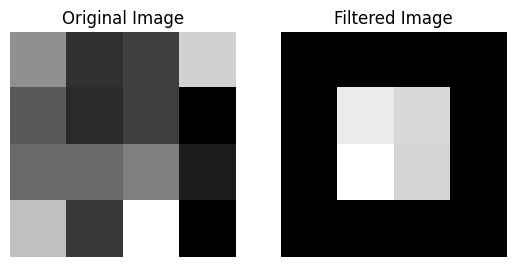

In [ ]:
'''
DOI: https://doi.org/10.1109/ICEECCOT.2017.8284595
Without using padding.
'''
import numpy as np
from scipy.ndimage import median_filter

def median_filter_window(window):
    return np.median(window)

def average_filter_window(window, median_value):
    return (window + median_value) / 2

def hybrid_filter(image, window_size):
    height, width = image.shape
    result_image = np.zeros_like(image, dtype=float)

    half_window_height, half_window_width = window_size[0] // 2, window_size[1] // 2

    for x in range(half_window_height, height - half_window_height):
        for y in range(half_window_width, width - half_window_width):
            sub_window = image[x - half_window_height:x + half_window_height + 1, y - half_window_width:y + half_window_width + 1]
            print(sub_window)

            # Median Value Calculation
            median_value = median_filter_window(sub_window)
            print(median_value)

            # Average Value Calculation
            average_values = average_filter_window(sub_window, median_value)
            print(average_values)

            # Center Pixel Value Calculation
            result_image[x, y] = np.mean(average_values)
            print(result_image[x, y], '\n')

    return result_image

# Example Original Image in Numpy
img = np.array([[156, 106, 114, 190],
            [128, 103, 114, 81],
            [136, 136, 147, 96],
            [181, 111, 214, 81]])

# Assuming image is a 2D NumPy array
window_size = (3, 3)  # Adjust the window size as needed

# Apply the filtering method
result = hybrid_filter(img, window_size)
print(result)

import matplotlib.pyplot as plt

# Assuming 'img' is your original image and 'result' is the filtered image

# Plot the original image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

# Plot the filtered image
plt.subplot(1, 2, 2)
plt.title('Filtered Image')
plt.imshow(result, cmap='gray')
plt.axis('off')

# Show the plot
plt.show()



[[  0   0   0]
 [  0 156 106]
 [  0 128 103]]
0.0
[[ 0.   0.   0. ]
 [ 0.  78.  53. ]
 [ 0.  64.  51.5]]
27.38888888888889 

[[  0   0   0]
 [156 106 114]
 [128 103 114]]
106.0
[[ 53.   53.   53. ]
 [131.  106.  110. ]
 [117.  104.5 110. ]]
93.05555555555556 

[[  0   0   0]
 [106 114 190]
 [103 114  81]]
103.0
[[ 51.5  51.5  51.5]
 [104.5 108.5 146.5]
 [103.  108.5  92. ]]
90.83333333333333 

[[  0   0   0]
 [114 190   0]
 [114  81   0]]
0.0
[[ 0.   0.   0. ]
 [57.  95.   0. ]
 [57.  40.5  0. ]]
27.72222222222222 

[[  0 156 106]
 [  0 128 103]
 [  0 136 136]]
106.0
[[ 53.  131.  106. ]
 [ 53.  117.  104.5]
 [ 53.  121.  121. ]]
95.5 

[[156 106 114]
 [128 103 114]
 [136 136 147]]
128.0
[[142.  117.  121. ]
 [128.  115.5 121. ]
 [132.  132.  137.5]]
127.33333333333333 

[[106 114 190]
 [103 114  81]
 [136 147  96]]
114.0
[[110.  114.  152. ]
 [108.5 114.   97.5]
 [125.  130.5 105. ]]
117.38888888888889 

[[114 190   0]
 [114  81   0]
 [147  96   0]]
96.0
[[105.  143.   48. ]
 [105.   

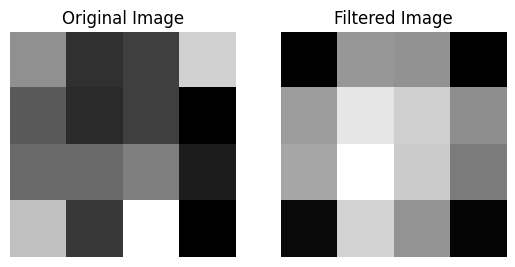

In [ ]:
'''
DOI: https://doi.org/10.1109/ICEECCOT.2017.8284595
Using padding for imnage border
Clean syntax.
'''
import numpy as np
from scipy.ndimage import median_filter

def hybrid_filter(image, window_size):
    height, width = image.shape

    # Calculate padding needed
    pad_height = window_size[0] // 2
    pad_width = window_size[1] // 2

    # Add padding to the image
    padded_image = cv2.copyMakeBorder(src=image, top=pad_height, bottom=pad_height, left=pad_width, right=pad_width, borderType=cv2.BORDER_CONSTANT, value=0) # cv2.BORDER_REFLECT

    # Create an output image with the same size as the input
    output_image = np.zeros_like(image, dtype=float)

    for x in range(pad_height, height + pad_height):
        for y in range(pad_width, width + pad_width):
            sub_window = padded_image[x - pad_height:x + pad_height + 1, y - pad_width:y + pad_width + 1]
            print(sub_window)

            # Median Value Calculation
            median_value = np.median(sub_window)
            print(median_value)

            # Average Value Calculation
            average_values = (sub_window + median_value) / 2
            print(average_values)

            # Center Pixel Value Calculation
            output_image[x - pad_height, y - pad_width] = np.mean(average_values)
            print(output_image[x - pad_height, y - pad_width], '\n')

    return output_image

img = np.array([[156, 106, 114, 190],
            [128, 103, 114, 81],
            [136, 136, 147, 96],
            [181, 111, 214, 81]])

# Assuming image is a 2D NumPy array
window_size = (3, 3)  # Adjust the window size as needed

# Apply the filtering method
result = hybrid_filter(img, window_size)
print(result)

import matplotlib.pyplot as plt

# Assuming 'img' is your original image and 'result' is the filtered image

# Plot the original image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

# Plot the filtered image
plt.subplot(1, 2, 2)
plt.title('Filtered Image')
plt.imshow(result, cmap='gray')
plt.axis('off')

# Show the plot
plt.show()



### Method 2
https://oirl.github.io/Speckle-Hybrid-median-mean/

https://doi.org/10.1117/1.OE.60.12.123107

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


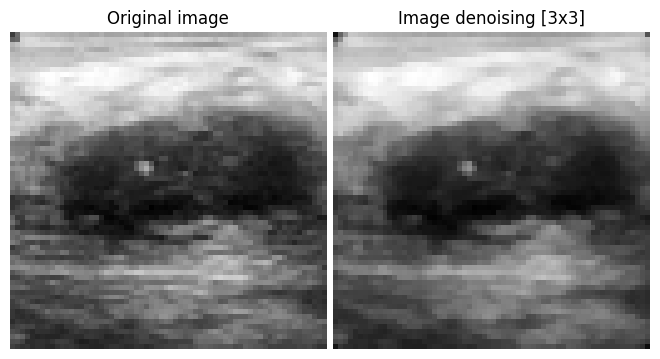

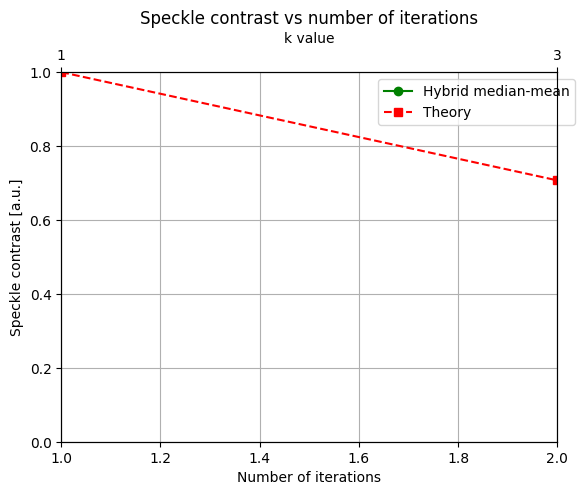

In [12]:
# libraries
import numpy as np
import cv2
from scipy import ndimage
from matplotlib import pyplot as plt


def measure_speckle(sample):
    # Define ROI coordinates
    # x1 = 0
    # y1 = 0
    # x2, y2 = sample.shape

    # Resize the image to half its size
    height, width = sample.shape
    newimg = cv2.resize(sample, (int(width / 2), int(height / 2)))
    sample = newimg

    # Calculate the coordinates of the ROI
    x1 = int(width * 0.2)
    y1 = int(height * 0.3)
    x2 = int(width * 0.2)
    y2 = int(height * 0.6)

    roi_mean = sample[x1:x2, y1:y2]
    std_mean = np.std(roi_mean)
    mean_mean = np.mean(roi_mean)
    max_speckle_contrast = std_mean / mean_mean
    return max_speckle_contrast, x1, y1, x2, y2, sample


def speckle_reduction(max_speckle_contrast, x1, y1, x2, y2, sample, max_kernel_size):
    mean_image = sample
    height, width = sample.shape  # get size of the image
    dim_vectors = round(int(max_kernel_size + 1) / 2)
    list_cont = list(range(1, dim_vectors + 1))
    array_cont = np.array(list_cont)
    list_kernel = list(range(1, max_kernel_size + 2, 2))
    array_kernel_size = np.array(list_kernel)
    cont = 1
    array_speckle_contrast = np.zeros(1)
    array_speckle_contrast[0] = max_speckle_contrast
    speckle_contrast = np.zeros([height, width, dim_vectors])
    for i in range(3, max_kernel_size + 2, 2):
        filter = ndimage.median_filter(sample, i, mode='constant', cval=0)
        # mean_image = (mean_image + filter) / 2
        correction_factor = np.mean(sample) / np.mean(filter)
        mean_image = (mean_image + filter * correction_factor) / 2
        speckle_contrast[:, :, cont] = mean_image
        # measure of speckle contrast
        roi_mean = mean_image[x1:x2, y1:y2]
        std_mean = np.std(roi_mean)
        mean_mean = np.mean(roi_mean)
        constrast_speckle_mean = std_mean / mean_mean
        array_speckle_contrast = np.append(array_speckle_contrast, [constrast_speckle_mean])
        cont = cont + 1
    max_contrast = max(array_speckle_contrast)
    array_speckle_contrast = array_speckle_contrast / max_contrast
    return array_cont, array_speckle_contrast, speckle_contrast, dim_vectors, array_kernel_size


def images(sample, speckle_contrast, dim_z):
    plt.subplot(121).set_title("Original image")
    plt.imshow(sample, cmap=plt.cm.gray)
    plt.axis('off')
    plt.subplot(122).set_title("Image denoising [" + str((2*dim_z-1)) + 'x' + str((2*dim_z-1)) + ']')
    # plt.imshow(speckle_contrast[:, :, 2], cmap=plt.cm.gray)
    plt.imshow(speckle_contrast[:, :, dim_z - 1], cmap=plt.cm.gray)  # Use dim_z - 1 instead of 2
    plt.axis('off')
    plt.subplots_adjust(wspace=0.02, hspace=0.02, top=1, bottom=0, left=0, right=1)
    plt.show()


def plots_true(array_cont, array_speckle_contrast, array_kernel_size):
    theory = 1 / np.sqrt(array_cont)
    max_contrast = max(array_speckle_contrast)
    vec_contras_speckle = array_speckle_contrast / max_contrast
    plt.plot(array_cont, vec_contras_speckle, label="Hybrid median-mean", marker='o', color='green', linestyle='solid')
    plt.plot(array_cont, theory, label="Theory", marker='s', color='red', linestyle='dashed')
    plt.axis([1, array_cont.size, 0, 1])
    plt.xlabel("Number of iterations")
    plt.ylabel("Speckle contrast [a.u.]")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper right')
    plt.title('Speckle contrast vs number of iterations')
    plt.grid()
    ax2 = plt.twiny()
    ax2.set_xlabel('k value', color='black')
    ax2.set_xticks(array_kernel_size)
    ax2.set_xlim((1, array_kernel_size[-1]))
    plt.show()


def save(sample, speckle_contrast):
    cv2.imwrite('original image.jpg', sample)
    cv2.imwrite('denoising image.jpg', speckle_contrast[:, :, -1])

def HybridMedianMean(sample, max_kernel_size, figures, plots, save_image):
    if max_kernel_size % 2 == 0:
        print('Kernel size must be a odd number')
        exit()
    max_speckle_contrast, x1, y1, x2, y2, sample = measure_speckle(sample)
    array_cont, array_speckle_contrast, speckle_contrast, dim_z, array_kernel_size = speckle_reduction\
        (max_speckle_contrast, x1, y1, x2, y2, sample, max_kernel_size)
    if figures == "True":
        images(sample, speckle_contrast, dim_z)
    elif figures == "False":
        pass
    else:
        print('figure only get two options: True or False')
        exit()
    if plots == "True":
        plots_true(array_cont, array_speckle_contrast, array_kernel_size)
    elif plots == "False":
        pass
    else:
        print('plots only get two options: True or False')
        exit()
    if save_image == "True":
        save(sample, speckle_contrast)
    elif save_image == "False":
        pass
    else:
        print('save_image only get two options: True or False')
        exit()

# Load the image
img_path = '/content/MT-Small-Dataset/dataset/Malignant/malignant_Adjusted (1).png'
# img_path = '/content/MT-Small-Dataset/dataset/Benign/benign_Adjusted (1).png'

img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

max_kernel_size = 3
figures = 'True'
plots = 'True'
save_image = 'True'
HybridMedianMean(img, max_kernel_size, figures, plots, save_image)

### Trial

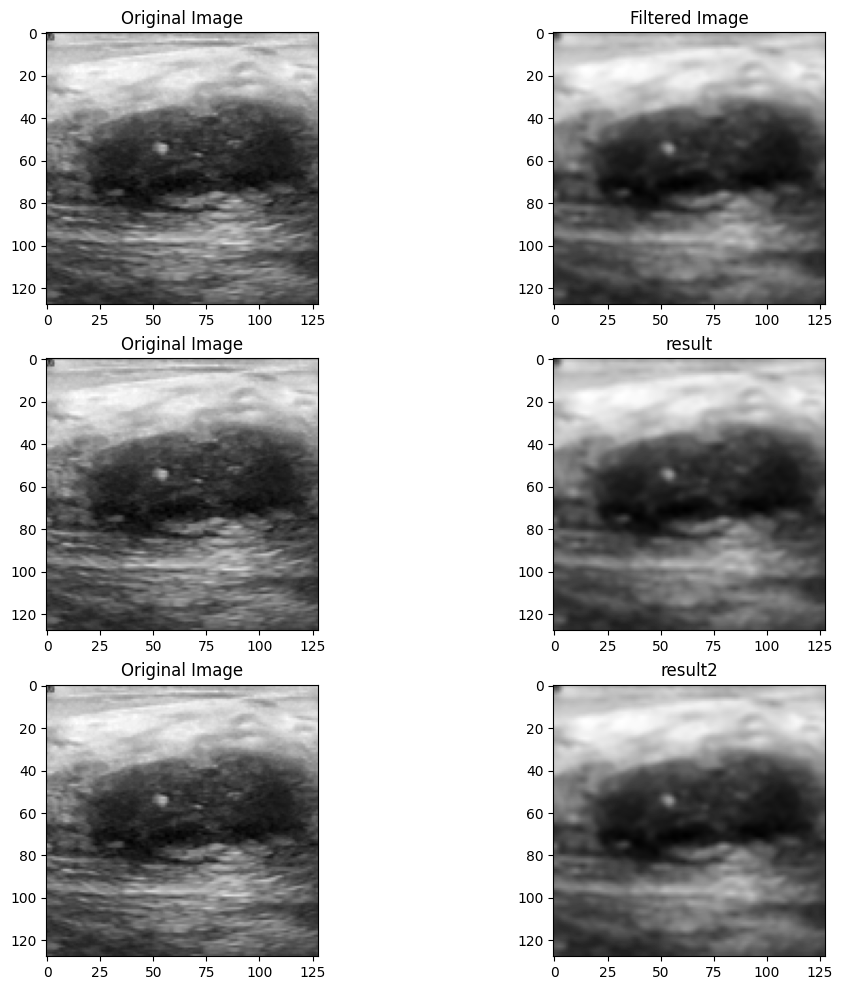

In [13]:
# Import the necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter

# Load the image
img_path = '/content/MT-Small-Dataset/dataset/Malignant/malignant_Adjusted (1).png'
# img_path = '/content/MT-Small-Dataset/dataset/Benign/benign_Adjusted (1).png'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

## Source: Github Copilot
def preprocess_func(img):
    # Convert the image to grayscale
    # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = img

    # Define the window size
    window_size = 3

    # Apply the median filter
    median_filtered_image = cv2.medianBlur(gray, window_size)

    # Define the padding for the convolution operation
    pad = window_size // 2

    # Pad the median filtered image
    padded_image = cv2.copyMakeBorder(median_filtered_image, pad, pad, pad, pad, cv2.BORDER_REFLECT)

    # Create an empty array to store the final image
    final_image = np.zeros_like(gray)

    # Apply the mean filter
    for i in range(gray.shape[0]):
        for j in range(gray.shape[1]):
            # Calculate the average value in the window around the pixel
            average_value = np.mean(padded_image[i:i+window_size, j:j+window_size])

            # Replace the original pixel value with the average value
            final_image[i, j] = int(average_value)

    return final_image

# Apply filter
filtered_img = preprocess_func(img)

## Source: ChatGPT
def median_and_mean_center_filter(image, window_size):
    # Apply median filtering
    median_filtered = median_filter(image, size=window_size)

    # Initialize result with zeros
    result = np.zeros_like(image, dtype=float)

    # Iterate over each pixel
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Extract the sub-window centered at (i, j)
            sub_window = median_filtered[max(0, i - window_size[0]//2):i + window_size[0]//2 + 1,
                                         max(0, j - window_size[1]//2):j + window_size[1]//2 + 1]

            # Calculate the average value for the sub-window
            average_value = np.mean(sub_window)

            # Update the result using the center pixel value
            result[i, j] = average_value

    return result

# Assuming image is a 2D NumPy array
window_size = (3, 3)  # Adjust the window size as needed

# Apply the filtering method
result = median_and_mean_center_filter(img, window_size)

## Source: ChatGPT # code 2
import numpy as np
from scipy.ndimage import median_filter

def hybrid_filter(image, window_size):
    height, width = image.shape

    # Calculate padding needed
    pad_height = window_size[0] // 2
    pad_width = window_size[1] // 2

    # Add padding to the image
    padded_image = cv2.copyMakeBorder(src=image, top=pad_height, bottom=pad_height, left=pad_width, right=pad_width, borderType=cv2.BORDER_CONSTANT, value=0) # cv2.BORDER_REFLECT

    # Create an output image with the same size as the input
    output_image = np.zeros_like(image, dtype=float)

    for x in range(pad_height, height + pad_height):
        for y in range(pad_width, width + pad_width):
            sub_window = padded_image[x - pad_height:x + pad_height + 1, y - pad_width:y + pad_width + 1]

            # Median Value Calculation
            median_value = np.median(sub_window)

            # Average Value Calculation
            average_values = (sub_window + median_value) / 2

            # Center Pixel Value Calculation
            output_image[x - pad_height, y - pad_width] = np.mean(average_values)

    return output_image

# Apply the filtering method
result2 = hybrid_filter(img, window_size)

# Display the original and processed images side by side
plt.figure(figsize=(12,12))

plt.subplot(3,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(3,2,2)
plt.imshow(filtered_img, cmap='gray')
plt.title('Filtered Image')

plt.subplot(3,2,3)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(3,2,4)
plt.imshow(result, cmap='gray')
plt.title('result')

plt.subplot(3,2,5)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(3,2,6)
plt.imshow(result, cmap='gray')
plt.title('result2')

plt.show()

In [14]:
from skimage.metrics import peak_signal_noise_ratio, mean_squared_error

def calculate_metrics(original, processed):
    # Calculate the PSNR
    psnr = peak_signal_noise_ratio(original, processed)

    # Calculate the RMSE
    rmse = np.sqrt(mean_squared_error(original, processed))

    # Calculate the SNR
    mean = np.mean(processed)
    std = np.std(processed)
    snr = 20 * np.log10(mean / (std + 1e-10)) # 1e-10: avoid error std=0

    return psnr, rmse, snr

# Calculate the metrics for the orginal image
psnr, rmse, snr = calculate_metrics(img, img)
print('Original Image')
print(f"PSNR: {psnr}")
print(f"RMSE: {rmse}")
print(f"SNR: {snr}")

# Calculate the metrics for the filtered image
psnr, rmse, snr = calculate_metrics(img, filtered_img)
print('\nGithub Copilot\'s code')
print(f"PSNR: {psnr}")
print(f"RMSE: {rmse}")
print(f"SNR: {snr}")

# Calculate the metrics for the result image
psnr, rmse, snr = calculate_metrics(img, result)
print('\nChatGPT\'s code')
print(f"PSNR: {psnr}")
print(f"RMSE: {rmse}")
print(f"SNR: {snr}")

# Calculate the metrics for the result image
psnr, rmse, snr = calculate_metrics(img, result2)
print('\nChatGPT\'s code2')
print(f"PSNR: {psnr}")
print(f"RMSE: {rmse}")
print(f"SNR: {snr}")

Original Image
PSNR: inf
RMSE: 0.0
SNR: 5.798326457770417

Github Copilot's code
PSNR: 28.12827025637056
RMSE: 10.002917055008254
SNR: 5.960991504377891

ChatGPT's code
PSNR: 28.100944055836152
RMSE: 10.034436237582145
SNR: 5.9925013683744766

ChatGPT's code2
PSNR: 29.015527160391787
RMSE: 9.03158185578031
SNR: 5.90112868914105


/usr/local/lib/python3.10/dist-packages/skimage/metrics/simple_metrics.py:163: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10((data_range ** 2) / err)
<ipython-input-14-c6ecea96bdff>:5: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr = peak_signal_noise_ratio(original, processed)


### Mass processing

In [15]:
import os
import cv2
import numpy as np
from shutil import copyfile
# from scipy.ndimage import median_filter

def preprocess_and_copy(src_dir, dest_dir, preprocess_func):
    # Check if src_dir is a directory
    if os.path.isdir(src_dir):
        # If dest_dir does not exist, create it
        os.makedirs(dest_dir, exist_ok=True)

        # Iterate over files/directories in src_dir
        for item in os.listdir(src_dir):
            src_item_path = os.path.join(src_dir, item)

            # If item is a directory, call function recursively
            if os.path.isdir(src_item_path):
                preprocess_and_copy(src_item_path, os.path.join(dest_dir, item), preprocess_func)
            # If item is a file, apply preprocessing and copy
            elif os.path.isfile(src_item_path):
                # Define the output file path
                filename_with_ext = os.path.basename(src_item_path)
                filename, extension = os.path.splitext(filename_with_ext)
                dest_item_path = os.path.join(dest_dir, filename + '.jpg')

                # Check if output file already exists
                if not os.path.exists(dest_item_path):
                    img = cv2.imread(src_item_path)
                    if img is not None:
                        img = preprocess_func(img)

                        # Export the preprocessed image to the output folder
                        cv2.imwrite(dest_item_path, img)

def hybrid_filter(image, window_size):
    height, width = image.shape

    # Calculate padding needed
    pad_height = window_size[0] // 2
    pad_width = window_size[1] // 2

    # Add padding to the image
    padded_image = cv2.copyMakeBorder(src=image, top=pad_height, bottom=pad_height, left=pad_width, right=pad_width, borderType=cv2.BORDER_CONSTANT, value=0) # cv2.BORDER_REFLECT

    # Create an output image with the same size as the input
    output_image = np.zeros_like(image, dtype=float)

    for x in range(pad_height, height + pad_height):
        for y in range(pad_width, width + pad_width):
            sub_window = padded_image[x - pad_height:x + pad_height + 1, y - pad_width:y + pad_width + 1]

            # Median Value Calculation
            median_value = np.median(sub_window)

            # Average Value Calculation
            average_values = (sub_window + median_value) / 2

            # Center Pixel Value Calculation
            output_image[x - pad_height, y - pad_width] = np.mean(average_values)

    return output_image

# Define your preprocessing function here
def preprocess_func(img):
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Assuming image is a 2D NumPy array
    window_size = (3, 3)  # Adjust the window size as needed

    # Apply the filtering method
    filtered_image = hybrid_filter(gray, window_size)

    return filtered_image

# Usage:
# dataset_path = '/content/MT-Small-Dataset/sample'
# output_path = '/content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/MT-Small-Dataset/Median-Mean-Hybrid-Filter_sample'
# dataset_path = '/content/MT-Small-Dataset/dataset'
# output_path = '/content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/MT-Small-Dataset/Median-Mean-Hybrid-Filter'
dataset_path = '/content/MT-Small-Dataset/dataset/Malignant'
output_path = '/content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/MT-Small-Dataset/Median-Mean-Hybrid-Filter/Malignant'
preprocess_and_copy(dataset_path, output_path, preprocess_func)
